# CLEANING DATA

## Import data 📒

In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn import preprocessing

# Read the train file from the raw directory
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')
train_df.isnull().sum()
test_df.isnull().sum()

Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
dtype: int64

## Data exploration 🔎


In [2]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

In [3]:
train_df.describe()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


In [4]:
train_df.shape

(3000, 26)

In [5]:
train_df.columns

Index(['Gender', 'Height (cm)', 'Weight (kg)', 'Blood Pressure (s/d)',
       'Cholesterol Level (mg/dL)', 'BMI', 'Blood Glucose Level (mg/dL)',
       'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diet', 'Chronic Diseases', 'Medication Use', 'Family History',
       'Cognitive Function', 'Mental Health Status', 'Sleep Patterns',
       'Stress Levels', 'Pollution Exposure', 'Sun Exposure',
       'Education Level', 'Income Level', 'Age (years)'],
      dtype='object')

In [6]:
train_df.isnull().sum()


Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64

In [7]:

train_df.dtypes


Gender                          object
Height (cm)                    float64
Weight (kg)                    float64
Blood Pressure (s/d)            object
Cholesterol Level (mg/dL)      float64
BMI                            float64
Blood Glucose Level (mg/dL)    float64
Bone Density (g/cm²)           float64
Vision Sharpness               float64
Hearing Ability (dB)           float64
Physical Activity Level         object
Smoking Status                  object
Alcohol Consumption             object
Diet                            object
Chronic Diseases                object
Medication Use                  object
Family History                  object
Cognitive Function             float64
Mental Health Status            object
Sleep Patterns                  object
Stress Levels                  float64
Pollution Exposure             float64
Sun Exposure                   float64
Education Level                 object
Income Level                    object
Age (years)              

In [8]:
train_df.head()


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


## Change the name of the columns 🧑‍💻


In [9]:
previous_columns = train_df.columns
print(previous_columns)

Index(['Gender', 'Height (cm)', 'Weight (kg)', 'Blood Pressure (s/d)',
       'Cholesterol Level (mg/dL)', 'BMI', 'Blood Glucose Level (mg/dL)',
       'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diet', 'Chronic Diseases', 'Medication Use', 'Family History',
       'Cognitive Function', 'Mental Health Status', 'Sleep Patterns',
       'Stress Levels', 'Pollution Exposure', 'Sun Exposure',
       'Education Level', 'Income Level', 'Age (years)'],
      dtype='object')


In [10]:
newColumnsObject = {
    'Age (years)': 'Age',
    'Income Level': 'Income',
    'Education Level': 'Education',
    'Sun Exposure': 'Sun_Exposure',
    'Pollution Exposure': 'Pollution',
    'Stress Levels': 'Stress',
    'Sleep Patterns': 'Sleep',
    'Mental Health Status': 'Mental_Health',
    'Cognitive Function': 'Cognitive_Function',
    'Family History': 'Family_History',
    'Medication Use': 'Medication',
    'Chronic Diseases': 'Chronic_Diseases',
    'Diet': 'Diet',
    'Alcohol Consumption': 'Alcohol',
    'Smoking Status': 'Smoking',
    'Physical Activity Level': 'Physical_Activity',
    'Hearing Ability (dB)': 'Hearing',
    'Vision Sharpness': 'Vision',
    'Bone Density (g/cm²)': 'Bone_Density',
    'Blood Glucose Level (mg/dL)': 'Blood_Glucose',
    'BMI': 'BMI',
    'Cholesterol Level (mg/dL)': 'Cholesterol',
    'Blood Pressure (s/d)': 'Blood_Pressure',
    'Weight (kg)': 'Weight',
    'Height (cm)': 'Height',
    'Gender': 'Gender'
}
named_train_df=train_df.rename(columns=newColumnsObject)
named_test_df=test_df.rename(columns=newColumnsObject)
new_columns = named_train_df.columns
print(new_columns)

Index(['Gender', 'Height', 'Weight', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Blood_Glucose', 'Bone_Density', 'Vision', 'Hearing',
       'Physical_Activity', 'Smoking', 'Alcohol', 'Diet', 'Chronic_Diseases',
       'Medication', 'Family_History', 'Cognitive_Function', 'Mental_Health',
       'Sleep', 'Stress', 'Pollution', 'Sun_Exposure', 'Education', 'Income',
       'Age'],
      dtype='object')


In [11]:
named_train_df.head(100)

,Gender,Height,Weight,Blood_Pressure,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,...,Family_History,Cognitive_Function,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Female,167.898496,61.912788,155/92,232.288204,21.962752,135.231267,0.395293,0.493862,43.688301,...,Diabetes,74.970438,Poor,Insomnia,7.633869,9.745918,0.626384,Undergraduate,Medium,64
96,Male,172.699671,87.238249,114/89,190.217941,29.249869,99.708924,1.367295,0.436119,42.789797,...,Diabetes,46.901118,Fair,Insomnia,5.691664,9.760138,1.506603,NaN,High,30
97,Female,155.240719,60.318172,133/99,192.248230,25.028619,91.125319,1.544714,0.765089,33.733417,...,NaN,75.239532,Good,Insomnia,5.264288,0.578444,11.493478,Postgraduate,High,24
98,Female,169.751680,78.488294,142/89,218.104550,27.238095,115.482685,1.070822,0.410582,48.432692,...,Diabetes,79.429948,Poor,Insomnia,5.229894,8.901411,8.492656,NaN,Low,49


## Handle columes having missing values


In [12]:
handle_missing_values_df = named_train_df
test_handle_missing_values_df = named_test_df
handle_missing_values_df.isnull().sum()


Gender                   0
Height                   0
Weight                   0
Blood_Pressure           0
Cholesterol              0
BMI                      0
Blood_Glucose            0
Bone_Density             0
Vision                   0
Hearing                  0
Physical_Activity        0
Smoking                  0
Alcohol               1201
Diet                     0
Chronic_Diseases      1299
Medication            1198
Family_History        1451
Cognitive_Function       0
Mental_Health            0
Sleep                    0
Stress                   0
Pollution                0
Sun_Exposure             0
Education              627
Income                   0
Age                      0
dtype: int64

Trong quá trình phân tích dữ liệu, ta thấy dữ liệu bị khuyết ở các cột:
 - Alcohol Consumption
 - Chronic_Diseases
 - Medication   
 - Family_History
 - Education

Giờ ta sẽ xử lý khuyết cho các cột này.


#### Alcohol Consumption


In [13]:
handle_missing_values_df["Alcohol"].value_counts()
test_handle_missing_values_df["Alcohol"].value_counts()

Alcohol
Occasional    1057
Frequent       742
Name: count, dtype: int64

In [14]:

handle_missing_values_df["Alcohol"].fillna(handle_missing_values_df["Alcohol"].mode()[0], inplace=True)
test_handle_missing_values_df["Alcohol"].fillna(test_handle_missing_values_df["Alcohol"].mode()[0], inplace=True)



C:\Users\DELL.DESKTOP-QUFQM0F\AppData\Local\Temp\ipykernel_6484\1622305803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  handle_missing_values_df["Alcohol"].fillna(handle_missing_values_df["Alcohol"].mode()[0], inplace=True)
C:\Users\DELL.DESKTOP-QUFQM0F\AppData\Local\Temp\ipykernel_6484\1622305803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the in

#### Chronic_Diseases



Cột này có thể sẽ ảnh hưởng tới Chronic Diseases nên ta sẽ điền với giá trị Unknown để giữ nguyên thông tin.


In [15]:
handle_missing_values_df["Chronic_Diseases"].unique()
test_handle_missing_values_df["Chronic_Diseases"].unique()


array([nan, 'Hypertension', 'Diabetes', 'Heart Disease'], dtype=object)

In [16]:

handle_missing_values_df["Chronic_Diseases"].value_counts()
test_handle_missing_values_df["Chronic_Diseases"].value_counts()

Chronic_Diseases
Hypertension     676
Diabetes         532
Heart Disease    493
Name: count, dtype: int64

In [17]:
handle_missing_values_df["Chronic_Diseases"] = handle_missing_values_df["Chronic_Diseases"].fillna(handle_missing_values_df["Chronic_Diseases"].mode()[0])
test_handle_missing_values_df["Chronic_Diseases"] = test_handle_missing_values_df["Chronic_Diseases"].fillna(test_handle_missing_values_df["Chronic_Diseases"].mode()[0])


In [18]:
handle_missing_values_df["Chronic_Diseases"].value_counts()
test_handle_missing_values_df["Chronic_Diseases"].value_counts()

Chronic_Diseases
Hypertension     1975
Diabetes          532
Heart Disease     493
Name: count, dtype: int64

#### Medication


In [19]:
handle_missing_values_df["Medication"].unique()
test_handle_missing_values_df["Medication"].unique()

array([nan, 'Regular', 'Occasional'], dtype=object)

In [20]:
handle_missing_values_df["Medication"].fillna(handle_missing_values_df["Medication"].mode()[0], inplace=True)
test_handle_missing_values_df["Medication"].fillna(test_handle_missing_values_df["Medication"].mode()[0], inplace=True)


C:\Users\DELL.DESKTOP-QUFQM0F\AppData\Local\Temp\ipykernel_6484\3619538971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  handle_missing_values_df["Medication"].fillna(handle_missing_values_df["Medication"].mode()[0], inplace=True)
C:\Users\DELL.DESKTOP-QUFQM0F\AppData\Local\Temp\ipykernel_6484\3619538971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because 

#### Family_History


In [21]:

handle_missing_values_df["Family_History"].unique()

array([nan, 'Heart Disease', 'Hypertension', 'Diabetes'], dtype=object)

In [22]:
handle_missing_values_df["Family_History"].fillna(handle_missing_values_df["Family_History"].mode()[0], inplace=True)
test_handle_missing_values_df["Family_History"].fillna(test_handle_missing_values_df["Family_History"].mode()[0], inplace=True)


C:\Users\DELL.DESKTOP-QUFQM0F\AppData\Local\Temp\ipykernel_6484\1496580135.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  handle_missing_values_df["Family_History"].fillna(handle_missing_values_df["Family_History"].mode()[0], inplace=True)
C:\Users\DELL.DESKTOP-QUFQM0F\AppData\Local\Temp\ipykernel_6484\1496580135.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work 

In [23]:

handle_missing_values_df["Family_History"].value_counts()


Family_History
Diabetes         2096
Heart Disease     453
Hypertension      451
Name: count, dtype: int64

#### Education


In [24]:
# Xử lý bằng giá trị xuất hiện nhiều nhất
handle_missing_values_df["Education"]=handle_missing_values_df["Education"].fillna(handle_missing_values_df["Education"].mode()[0])
test_handle_missing_values_df["Education"]=test_handle_missing_values_df["Education"].fillna(test_handle_missing_values_df["Education"].mode()[0])

handle_missing_values_df["Education"].value_counts()



Education
Undergraduate    1511
High School       883
Postgraduate      606
Name: count, dtype: int64

## Change the blood pressure

In [25]:
train_split = handle_missing_values_df['Blood_Pressure'].str.split('/', expand=True)
handle_missing_values_df['Systolic_BP'] = pd.to_numeric(train_split[0])
handle_missing_values_df['Diastolic_BP'] = pd.to_numeric(train_split[1])

test_split = test_handle_missing_values_df['Blood_Pressure'].str.split('/', expand=True)
test_handle_missing_values_df['Systolic_BP'] = pd.to_numeric(test_split[0])
test_handle_missing_values_df['Diastolic_BP'] = pd.to_numeric(test_split[1])


# Drop the original "Blood Pressure (s/d)" column
handle_missing_values_df.drop(columns=['Blood_Pressure'], inplace=True)
test_handle_missing_values_df.drop(columns=['Blood_Pressure'], inplace=True)

In [26]:
handle_missing_values_df.head()

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Good,Insomnia,2.797064,5.142344,7.108975,Undergraduate,Medium,89,151,109
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134,112
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Poor,Insomnia,9.234637,8.500386,5.393408,Undergraduate,Medium,70,160,101
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Poor,Insomnia,4.693446,7.555511,2.745578,Undergraduate,Low,52,133,94
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170,106


# Outlier

In [27]:
categorical_features = named_train_df.select_dtypes(include=['object', 'category']).columns
numeric_columns = named_train_df.select_dtypes(include=['number']).columns

In [28]:
numeric_columns 

Index(['Height', 'Weight', 'Cholesterol', 'BMI', 'Blood_Glucose',
       'Bone_Density', 'Vision', 'Hearing', 'Cognitive_Function', 'Stress',
       'Pollution', 'Sun_Exposure', 'Age', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

C:\Users\DELL.DESKTOP-QUFQM0F\AppData\Local\Temp\ipykernel_6484\1733410451.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([handle_missing_values_df[col] for col in numeric_columns], labels=numeric_columns)


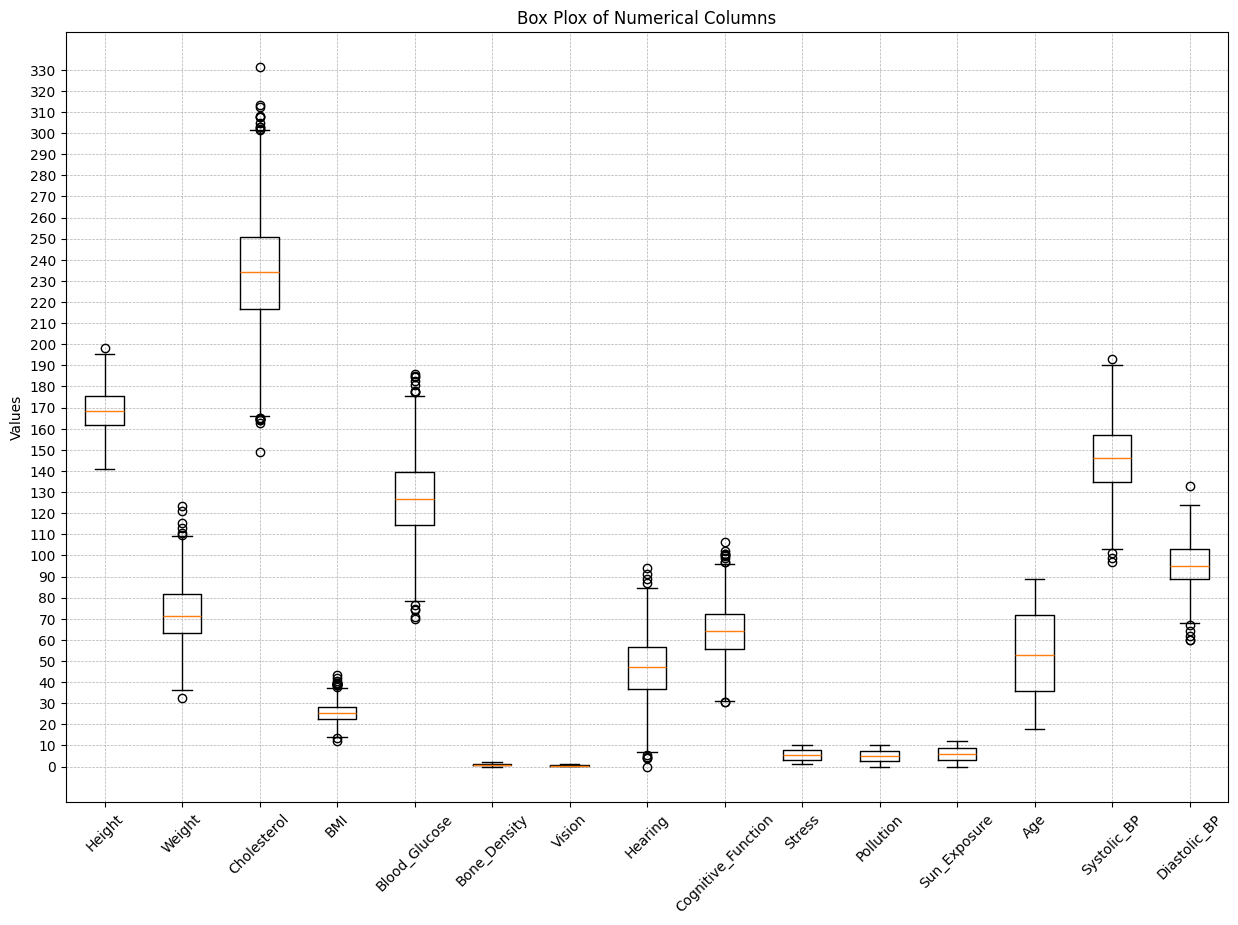

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.boxplot([handle_missing_values_df[col] for col in numeric_columns], labels=numeric_columns)
plt.title("Box Plox of Numerical Columns")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.grid(linestyle="--", linewidth=0.5)
plt.yticks(range(int(handle_missing_values_df[numeric_columns].min().min()), int(handle_missing_values_df[numeric_columns].max().max())+1,10))
plt.show()

In [30]:
def cap_outliers(data, numeric_columns, factor=1.5):
    capped_data = handle_missing_values_df.copy()
    
    for col in numeric_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        capped_data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        
    return capped_data


data = cap_outliers(handle_missing_values_df,numeric_columns,1.5)

C:\Users\DELL.DESKTOP-QUFQM0F\AppData\Local\Temp\ipykernel_6484\1424810779.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[col] for col in numeric_columns], labels=numeric_columns)


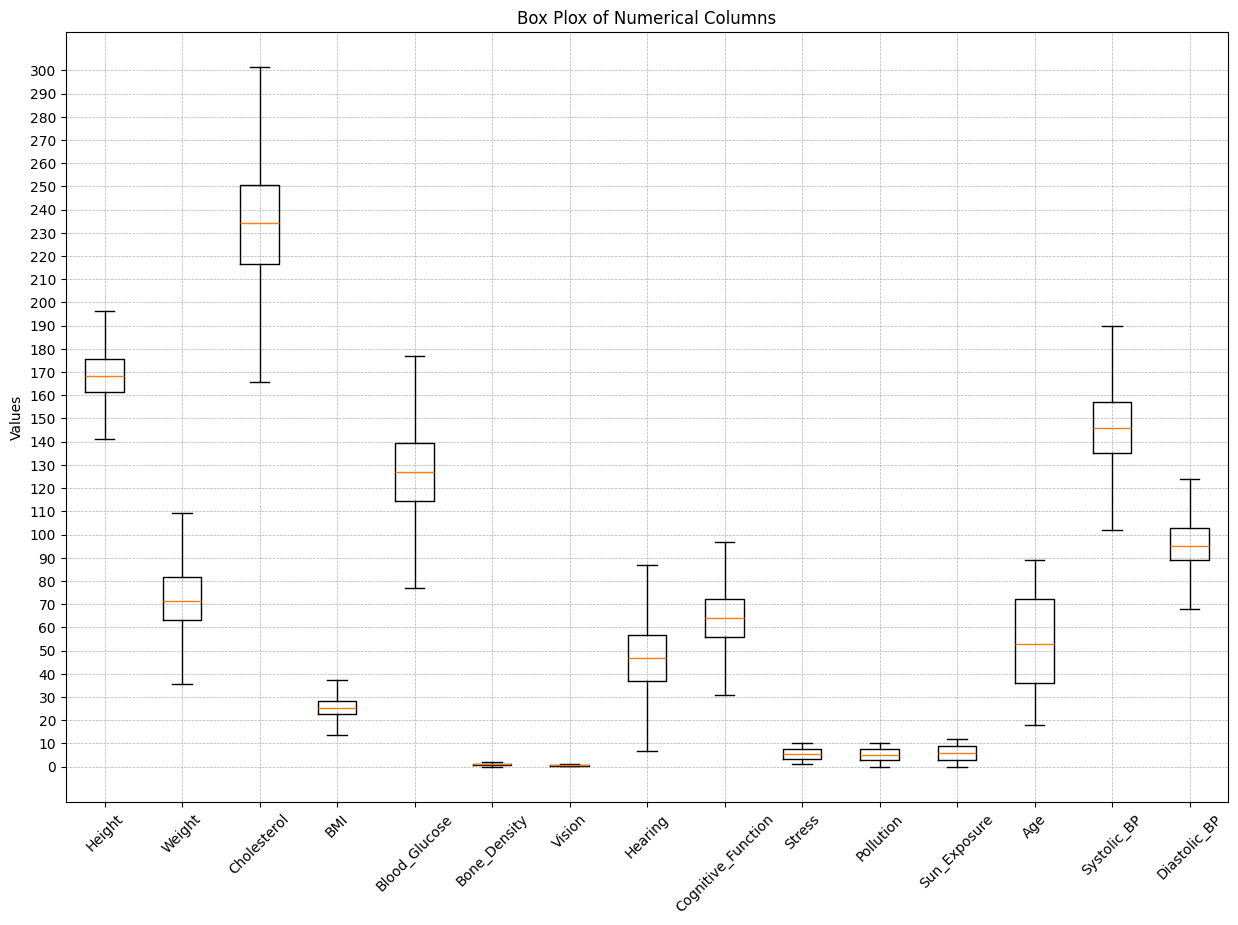

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.boxplot([data[col] for col in numeric_columns], labels=numeric_columns)
plt.title("Box Plox of Numerical Columns")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.grid(linestyle="--", linewidth=0.5)
plt.yticks(range(int(data[numeric_columns].min().min()), int(data[numeric_columns].max().max())+1,10))
plt.show()

## Export to data in data folder


In [32]:
data.to_csv('../data/interim/handled_missing_values.csv', index=False)
test_handle_missing_values_df.to_csv('../data/interim/test_handled_missing_values.csv', index=False)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              3000 non-null   object 
 1   Height              3000 non-null   float64
 2   Weight              3000 non-null   float64
 3   Cholesterol         3000 non-null   float64
 4   BMI                 3000 non-null   float64
 5   Blood_Glucose       3000 non-null   float64
 6   Bone_Density        3000 non-null   float64
 7   Vision              3000 non-null   float64
 8   Hearing             3000 non-null   float64
 9   Physical_Activity   3000 non-null   object 
 10  Smoking             3000 non-null   object 
 11  Alcohol             3000 non-null   object 
 12  Diet                3000 non-null   object 
 13  Chronic_Diseases    3000 non-null   object 
 14  Medication          3000 non-null   object 
 15  Family_History      3000 non-null   object 
 16  Cognit

## Xử lý giá trị null bằng phương pháp KNN

In [33]:
encoded_data = named_train_df
encoders = {}
for col in encoded_data.columns:
    if encoded_data[col].dtype == 'object' or encoded_data[col].isnull().any():
        encoder = preprocessing.LabelEncoder()
        encoded_data[col] = pd.Series(
            encoder.fit_transform(encoded_data[col][encoded_data[col].notnull()]),
            index=encoded_data[col][encoded_data[col].notnull()].index)
        encoders[col] = encoder 

In [34]:
encoded_data.head()

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
0,1,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,2,...,2,1,2.797064,5.142344,7.108975,2,2,89,151,109
1,1,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,1,...,2,2,9.339930,7.272720,3.918489,2,2,77,134,112
2,0,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,2,...,3,1,9.234637,8.500386,5.393408,2,2,70,160,101
3,0,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,2,...,3,1,4.693446,7.555511,2.745578,2,1,52,133,94
4,0,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,1,...,2,2,4.038537,9.429097,3.878435,2,0,79,170,106


In [35]:
imputer = KNNImputer(n_neighbors=15)
imputed_data = pd.DataFrame(imputer.fit_transform(encoded_data), columns=encoded_data.columns)

In [36]:
imputed_data.head()

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
0,1.0,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,2.0,...,2.0,1.0,2.797064,5.142344,7.108975,2.0,2.0,89.0,151.0,109.0
1,1.0,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,1.0,...,2.0,2.0,9.339930,7.272720,3.918489,2.0,2.0,77.0,134.0,112.0
2,0.0,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,2.0,...,3.0,1.0,9.234637,8.500386,5.393408,2.0,2.0,70.0,160.0,101.0
3,0.0,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,2.0,...,3.0,1.0,4.693446,7.555511,2.745578,2.0,1.0,52.0,133.0,94.0
4,0.0,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,1.0,...,2.0,2.0,4.038537,9.429097,3.878435,2.0,0.0,79.0,170.0,106.0


In [37]:
decoded_data = imputed_data.copy()
for col, encoder in encoders.items():
    decoded_data[col] = pd.Series(
        encoder.inverse_transform(decoded_data[col].round().astype(int)),
        index=decoded_data.index
    )

In [38]:
decoded_data.head(5)

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Good,Insomnia,2.797064,5.142344,7.108975,Undergraduate,Medium,89.0,151.0,109.0
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77.0,134.0,112.0
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Poor,Insomnia,9.234637,8.500386,5.393408,Undergraduate,Medium,70.0,160.0,101.0
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Poor,Insomnia,4.693446,7.555511,2.745578,Undergraduate,Low,52.0,133.0,94.0
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79.0,170.0,106.0
